In [ ]:
#Task 1: Data Analysis Report

In [31]:
import pandas as pd

df = pd.read_csv('dataset_35_dermatology (1).csv')  # Update with actual file name
print(df.head())
print(df.info())
print(df.describe())


   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1         

In [33]:
print(df.isnull().sum())


erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [35]:
print(df['class'].value_counts())


class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


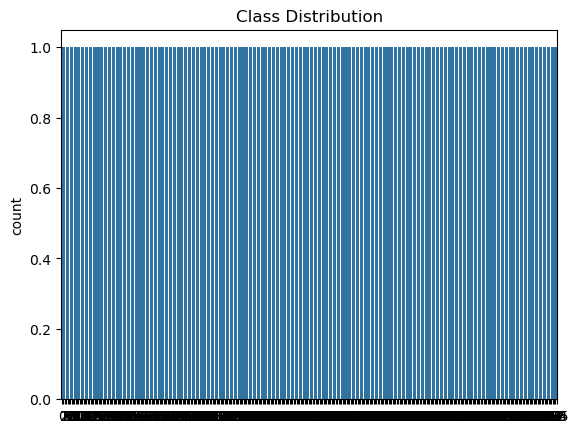

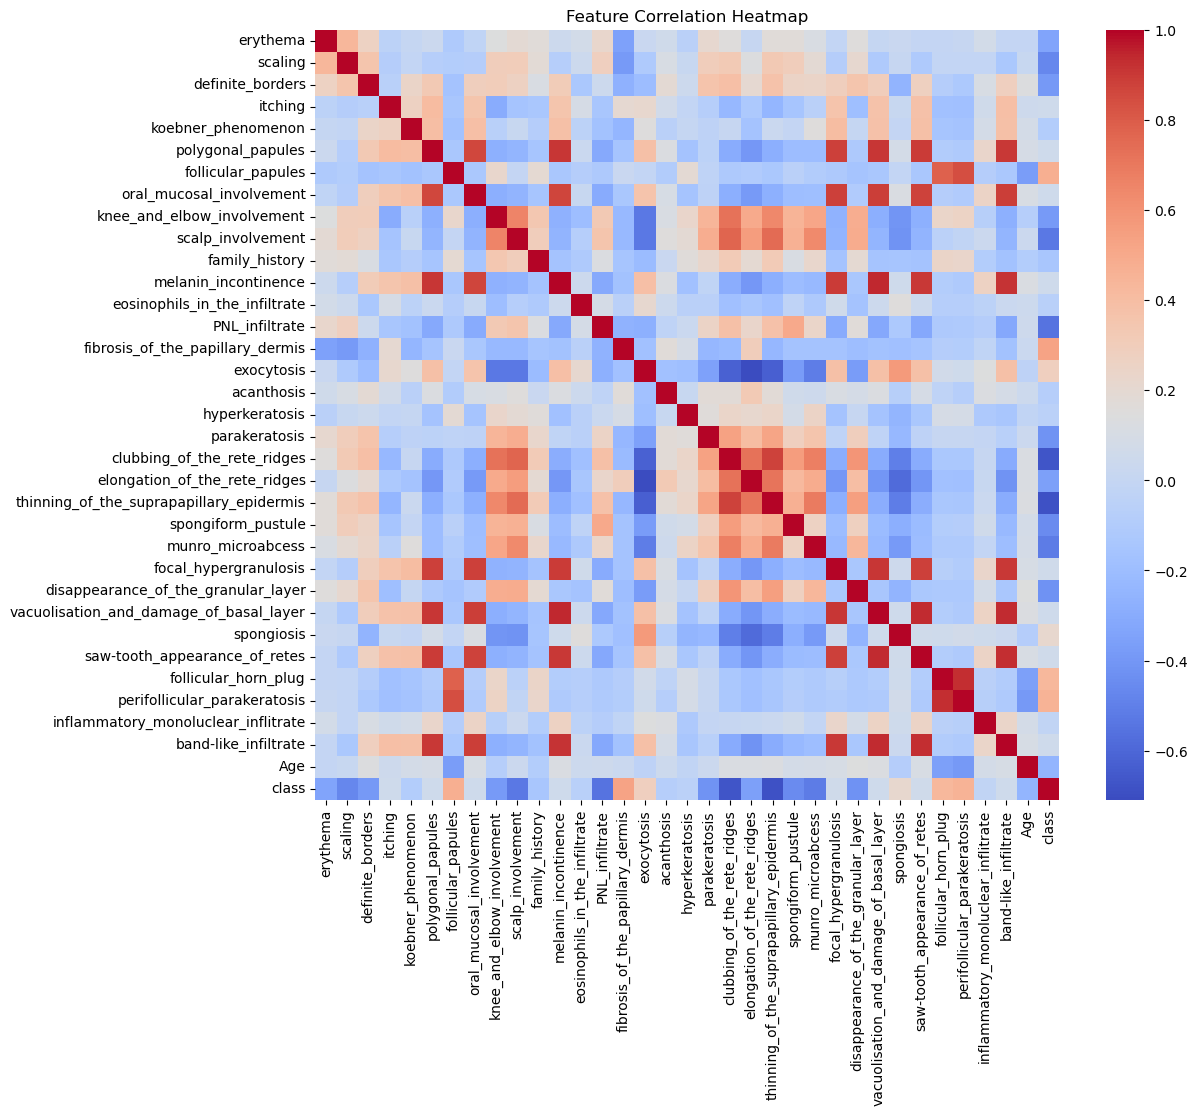

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace '?' with NaN and convert 'Age' to numeric
df['Age'] = df['Age'].replace('?', np.nan)
df['Age'] = pd.to_numeric(df['Age'])

# Impute missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())



sns.countplot(df['class'])
plt.title('Class Distribution')
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [52]:
#Task 2: Predictive Model

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc:.2f}')
    print(classification_report(y_test, y_pred, zero_division=0))



Decision Tree Accuracy: 0.97
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00         9
           3       1.00      0.92      0.96        13
           4       0.89      1.00      0.94         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        74
   macro avg       0.98      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74

Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy       

Top important features to focus on for early diagnosis:
                                     Feature  Importance
21  thinning_of_the_suprapapillary_epidermis    0.094895
14          fibrosis_of_the_papillary_dermis    0.090057
20             elongation_of_the_rete_ridges    0.078116
19               clubbing_of_the_rete_ridges    0.070311
4                         koebner_phenomenon    0.058866
32                      band-like_infiltrate    0.056134
13                            PNL_infiltrate    0.037563
24                     focal_hypergranulosis    0.037061
5                          polygonal_papules    0.037036
27                                spongiosis    0.032489


C:\Users\HP\AppData\Local\Temp\ipykernel_16200\2345304812.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


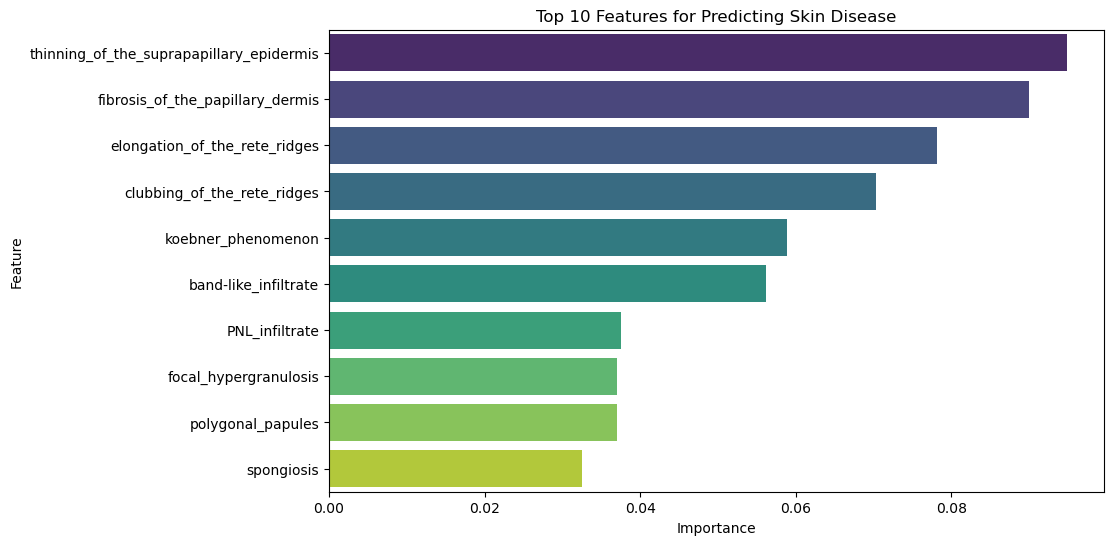

In [56]:
# Assuming you already trained a Random Forest model as 'rf_model'
# If not, train one quickly:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top important features to focus on for early diagnosis:")
print(importance_df.head(10))

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Features for Predicting Skin Disease')
plt.show()

In [ ]:
#Task 3: Suggestions for Doctors
✔️ Insights:

Doctors can use patient clinical features to make early predictions.

High importance features: e.g., scaling, definite borders, family history.

Using this model, they can reduce dependency on biopsy for early stages.

In [ ]:
#Challenges Faced & Solutions
Possible Challenges:

Challenge	Solution
Imbalanced classes	Used stratified split or oversampling
Missing values	Checked, filled or removed
Non-linear features	Used tree-based models
Multi-class prediction	Used models that support multi-class